## imports and files

In [22]:
import pandas as pd
import os
import sys
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
from typing import Dict, List

pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()["_dh"][0]
project_dir = __file__ = globals()["_dh"][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, "..", "..", "..", "..")))

from experiments.utils.constants import PIPELINE_PROFILING_RESULTS_PATH
from experiments.utils.parser import Parser

In [23]:
series = 20
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(PIPELINE_PROFILING_RESULTS_PATH, "series", str(series))

loader = Parser(
    series_path=series_path,
    config_key_mapper=config_key_mapper,
    model_name="video",
    type_of="router_pipeline",
)

In [24]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config)

File name: 3.yaml
{   'benchmark_duration': 1,
    'central_queue': True,
    'distrpution_time': 10,
    'metadata': 'starting audio-qa',
    'mode': 'exponential',
    'nodes': [   {   'cpu_request': ['8'],
                     'data_type': 'audio',
                     'max_batch_size': ['1'],
                     'max_batch_time': ['1'],
                     'memory_request': ['10Gi'],
                     'model_variants': [   'facebook/s2t-small-librispeech-asr',
                                           'facebook/s2t-medium-librispeech-asr'],
                     'node_name': 'audio',
                     'num_interop_threads': ['1'],
                     'num_threads': ['1'],
                     'replicas': [1],
                     'use_threading': 'True'},
                 {   'cpu_request': ['2', '8'],
                     'data_type': 'text',
                     'max_batch_size': ['1'],
                     'max_batch_time': ['1'],
                     'memory_request': 

## config map reader

In [25]:
key_config_df = loader.key_config_mapper()
# display(key_config_df)
key_config_df.columns
results = loader.result_processing()

In [26]:
results

,experiment_id,client_to_router_latencies_avg,client_to_router_latencies_p99,client_to_router_latencies_p95,client_to_router_latencies_p50,client_to_router_latencies_var,client_to_router_latencies_max,client_to_router_latencies_min,router_to_task_0_latencies_avg,router_to_task_0_latencies_p99,...,task_1_memory_usage_var,task_1_memory_usage_max,task_1_memory_usage_min,task_1_throughput_avg,task_1_throughput_p99,task_1_throughput_p95,task_1_throughput_p50,task_1_throughput_var,task_1_throughput_max,task_1_throughput_min
0,3,0.010769,0.043006,0.015497,0.009485,0.000068,0.110200,0.005829,41.746229,81.305283,...,1.577169e+13,1.173090e+09,1.163612e+09,2.040265,4.187730,4.052128,2.022024,1.675091,4.219858,0.019077
1,4,0.010779,0.027758,0.015763,0.009513,0.000078,0.119580,0.005742,41.875841,82.882008,...,2.874913e+12,1.196351e+09,1.191834e+09,2.037618,4.140282,3.997183,2.035385,1.615219,4.183099,0.019727
2,6,0.010478,0.022586,0.014857,0.009753,0.000027,0.097251,0.006435,79.205162,153.296680,...,1.460906e+12,1.192505e+09,1.188336e+09,1.370233,2.781784,2.706377,1.368890,0.714143,2.793427,0.011056
3,5,0.011752,0.062008,0.017630,0.010006,0.000087,0.117767,0.006847,71.736277,139.615040,...,2.825530e+16,1.183580e+09,2.678784e+06,1.457592,2.953500,2.865000,1.454980,0.815966,2.980000,0.014423


In [27]:
for item in results.columns:
    print(item)

experiment_id
client_to_router_latencies_avg
client_to_router_latencies_p99
client_to_router_latencies_p95
client_to_router_latencies_p50
client_to_router_latencies_var
client_to_router_latencies_max
client_to_router_latencies_min
router_to_task_0_latencies_avg
router_to_task_0_latencies_p99
router_to_task_0_latencies_p95
router_to_task_0_latencies_p50
router_to_task_0_latencies_var
router_to_task_0_latencies_max
router_to_task_0_latencies_min
task_0_model_avg
task_0_model_p99
task_0_model_p95
task_0_model_p50
task_0_model_var
task_0_model_max
task_0_model_min
task_0_to_task_1_latencies_avg
task_0_to_task_1_latencies_p99
task_0_to_task_1_latencies_p95
task_0_to_task_1_latencies_p50
task_0_to_task_1_latencies_var
task_0_to_task_1_latencies_max
task_0_to_task_1_latencies_min
task_1_model_avg
task_1_model_p99
task_1_model_p95
task_1_model_p50
task_1_model_var
task_1_model_max
task_1_model_min
task_1_to_router_avg
task_1_to_router_p99
task_1_to_router_p95
task_1_to_router_p50
task_1_to_rou

In [28]:
# experiment_id = 1
# experiment_results = loader.get_experiment_detail(experiment_id=experiment_id)
# # display(experiment_results)
# # -------------------------
# experiment_results.keys()
# filenames = loader.get_result_file_names()
# # display(filenames)
# # -------------------------
# results = loader._read_results()
# # display(results.keys())
# # -------------------------
# flattened_results = loader.flatten_results(results["1"]["responses"])
# # display(flattened_results)
# # -------------------------
# experiment_id = 1
# _, flattened_results = loader.flatten_results(results[str(experiment_id)]["responses"])
# latencies, timeout_count = loader.latency_calculator(flattened_results)
# # display(pd.DataFrame(latencies))
# # -------------------------
# results = loader.result_processing()
# # print(results)
# # print(list(results.columns))
# for item in list(results.columns):
#     if "task_0" in item:
#         print(item)
# # -------------------------
# for item in results.columns:
#     print(item)
# # -------------------------
# # experiment_id = 1
# # _, flattened_results = loader.flatten_results(results[str(experiment_id)]["responses"])
# # latencies, timeout_count = loader.latency_calculator(flattened_results)
# # display(pd.DataFrame(latencies))
# # -------------------------
# # summary = loader.latency_summary(latencies=latencies)
# # pd.DataFrame(list(summary.items()))

In [29]:
key_config_df = loader.key_config_mapper()
print(key_config_df.columns)
# selected_key_config_df =  key_config_df[key_config_df['model_variant_1'] == 'yolov5n']
# selected_key_config_df
key_config_df

Index(['experiment_id', 'pipeline_name', 'load', 'load_duration', 'series',
       'metadata', 'mode', 'data_type', 'benchmark_duration',
       'task_0_node_name', 'task_0_model_variant', 'task_0_cpu_request',
       'task_0_memory_request', 'task_0_max_batch_size',
       'task_0_max_batch_time', 'task_0_replica', 'task_1_node_name',
       'task_1_model_variant', 'task_1_cpu_request', 'task_1_memory_request',
       'task_1_max_batch_size', 'task_1_max_batch_time', 'task_1_replica'],
      dtype='object')


,experiment_id,pipeline_name,load,load_duration,series,metadata,mode,data_type,benchmark_duration,task_0_node_name,...,task_0_max_batch_size,task_0_max_batch_time,task_0_replica,task_1_node_name,task_1_model_variant,task_1_cpu_request,task_1_memory_request,task_1_max_batch_size,task_1_max_batch_time,task_1_replica
0,1,audio-qa,10,60,20,starting audio-qa,exponential,audio,1,audio,...,1,1,1,nlp-qa,deepset/roberta-base-squad2,2,10Gi,1,1,1
1,2,audio-qa,10,60,20,starting audio-qa,exponential,audio,1,audio,...,1,1,1,nlp-qa,deepset/roberta-base-squad2,8,10Gi,1,1,1
2,3,audio-qa,10,60,20,starting audio-qa,exponential,audio,1,audio,...,1,1,1,nlp-qa,deepset-roberta-base-squad2,2,10Gi,1,1,1
3,4,audio-qa,10,60,20,starting audio-qa,exponential,audio,1,audio,...,1,1,1,nlp-qa,deepset-roberta-base-squad2,8,10Gi,1,1,1
4,5,audio-qa,10,60,20,starting audio-qa,exponential,audio,1,audio,...,1,1,1,nlp-qa,deepset-roberta-base-squad2,2,10Gi,1,1,1
5,6,audio-qa,10,60,20,starting audio-qa,exponential,audio,1,audio,...,1,1,1,nlp-qa,deepset-roberta-base-squad2,8,10Gi,1,1,1


In [30]:
def draw_dicts(dict_to_draw: Dict[str, List[int]], adaptation_interval=None):
    num_keys = len(dict_to_draw.keys())
    fig, axs = plt.subplots(nrows=num_keys, ncols=1, figsize=(10, num_keys * 2))
    x_values = range(len(list(dict_to_draw.values())[0]))
    if adaptation_interval is not None:
        x_values = [item * adaptation_interval for item in list(x_values)]
    if num_keys > 1:
        for i, key in enumerate(dict_to_draw.keys()):
            axs[i].plot(x_values, dict_to_draw[key], label=key)
            axs[i].set_title(key)
            axs[i].legend()
    else:
        key = list(dict_to_draw.keys())[0]
        axs.plot(x_values, dict_to_draw[key], label=key)
        axs.set_title(key)
        axs.legend()

    plt.tight_layout()
    plt.show()

In [31]:
experiment_id = 3
timeout_per_second, per_second_results = loader.per_second_result_processing(
    experiment_id=experiment_id
)

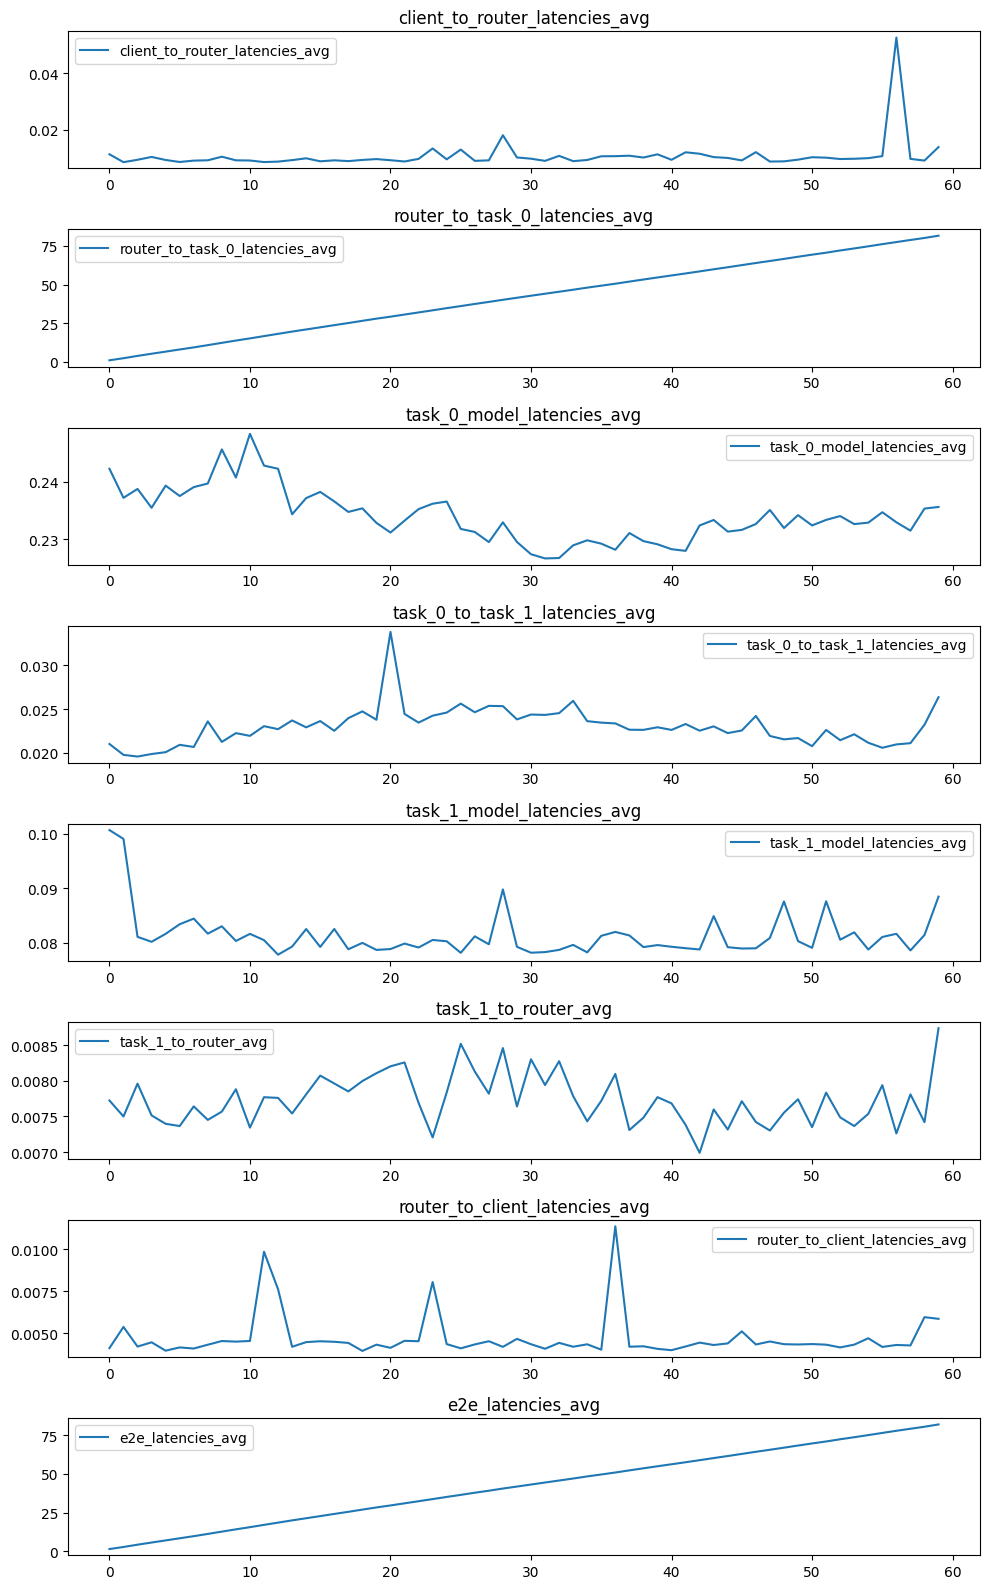

In [32]:
p99_cols = list(filter(lambda col: "avg" in col, per_second_results.columns))
p99_all = per_second_results[p99_cols]  # [1400:]
# p99_all["p99_e2e"] = p99_all.sum(axis=1).to_list()
draw_dicts(p99_all.to_dict(orient="list"))

In [33]:
per_second_results.keys()

Index(['client_to_router_latencies_avg', 'client_to_router_latencies_p99',
       'client_to_router_latencies_p95', 'client_to_router_latencies_p50',
       'client_to_router_latencies_var', 'client_to_router_latencies_max',
       'client_to_router_latencies_min', 'router_to_task_0_latencies_avg',
       'router_to_task_0_latencies_p99', 'router_to_task_0_latencies_p95',
       'router_to_task_0_latencies_p50', 'router_to_task_0_latencies_var',
       'router_to_task_0_latencies_max', 'router_to_task_0_latencies_min',
       'task_0_model_avg', 'task_0_model_p99',
       'task_0_model_p95', 'task_0_model_p50',
       'task_0_model_var', 'task_0_model_max',
       'task_0_model_min', 'task_0_to_task_1_latencies_avg',
       'task_0_to_task_1_latencies_p99', 'task_0_to_task_1_latencies_p95',
       'task_0_to_task_1_latencies_p50', 'task_0_to_task_1_latencies_var',
       'task_0_to_task_1_latencies_max', 'task_0_to_task_1_latencies_min',
       'task_1_model_avg', 'task_1_model_p99',
 